# Loan Approval Prediction

## Importing Required libraries

- **numpy**  
  Used for numerical operations, especially handling arrays and performing mathematical computations.

- **pandas**  
  A powerful library for data manipulation and analysis using flexible data structures like DataFrames.

- **matplotlib.pyplot**  
  A plotting library for creating static, animated, and interactive visualizations in Python.

- **seaborn**  
  Built on top of Matplotlib, it provides a high-level interface for drawing attractive and informative statistical graphics.

- **MinMaxScaler, LabelEncoder (from sklearn.preprocessing)**  
  Used for preprocessing data:  
  `MinMaxScaler` scales numeric values to a specific range (often 0 to 1).  
  `LabelEncoder` converts categorical labels into numeric form.

- **train_test_split (from sklearn.model_selection)**  
  Splits the data into training and testing sets to evaluate model performance fairly.

- **LogisticRegression**  
  A machine learning algorithm used for binary classification problems.

- **DecisionTreeClassifier**  
  A tree-structured classifier that splits the data based on feature conditions for classification.

- **RandomForestClassifier**  
  An ensemble classifier that builds multiple decision trees and merges their results for better performance and reduced overfitting.

- **classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score (from sklearn.metrics)**  
  Various metrics for evaluating model performance:  
  `classification_report` shows precision, recall, and F1-score.  
  `accuracy_score` gives the percentage of correct predictions.  
  `mean_absolute_error` and `mean_squared_error` measure prediction error in regression.  
  `r2_score` shows how well the model fits the data.

- **joblib**  
  Used for saving and loading machine learning models, allowing reusability without retraining.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import joblib

## Loading the dataset

In [2]:
#  Load Dataset
data = pd.read_csv(r"D:\loan_approval_dataset.csv")
print(" Data Loaded Successfully!\n")
print(data.info())

 Data Loaded Successfully!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usag

---
## Cleaning column names
**This line removes any Trailing or leading whitespaces ensuring error-free data fetching**

In [3]:
#  Clean Column Names
data.columns = data.columns.str.strip()

---
## Handling missing values

- **Missing Value Analysis:**
  Displays the total count of missing (`NaN`) values in each column.  
  This helps identify where data cleaning or imputation is needed.

- **Impute Numeric Columns with Median:**
  Fills missing values in all **numeric columns** with the **median** of that column.  
  The median is resistant to outliers and gives a stable central value, making it a good choice for replacing missing numeric data.

- **Impute Categorical Columns with Mode:**
  Fills missing values in all **categorical columns** with the **mode** (most frequent value) of that column.  
  For categorical data, using the most common value avoids introducing bias from rare categories.

- **Verify Missing Values After Handling:**
  Prints the dataset again after handling missing values to confirm that no `NaN` entries remain.


In [4]:
# Missing Value Analysis
print("\nMissing Values in Dataset:\n")
print(data.isnull().sum())

# Handle Missing Values
# Impute numeric columns with median
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Impute categorical columns with mode
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

print("\nMissing Values After Analysis:\n")
print(data.isnull().sum())


Missing Values in Dataset:

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Missing Values After Analysis:

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


---
## Scale Numeric Data

**Scaling numeric data is important to ensure that all features are on a similar scale, especially when using machine learning algorithms sensitive to the magnitude of values (like Logistic Regression or K-Nearest Neighbors).**

--- 
Applies **Min-Max scaling** to all **integer** columns in the dataset. Min-Max scaling transforms the data into a range [0, 1], which helps in making the model training faster and improves convergence in many machine learning algorithms.

In [5]:
#  Scale Numeric Data
# Unified scaling for all numerical columns
scaler = MinMaxScaler()
num_cols = data.select_dtypes(include='int64').columns
data[num_cols] = scaler.fit_transform(data[num_cols])

## Save the Scaler for Future Use

**After training and scaling the data, it’s essential to save the scaler so that we can use it in the future without needing to retrain it.**

---
 Saves the trained **MinMaxScaler** object to a file using **joblib**, which can later be loaded for making predictions on new data in a deployment setting.  When deploying models to production (e.g., using Streamlit or any other web framework), the scaler needs to be applied to incoming data in the same way it was applied to the training data. Saving it ensures consistency in how the data is processed.**


In [6]:
# Save the scaler for Streamlit
joblib.dump(scaler, r"D:\loan_approval_pred\ml_model\scaler.pkl")

['D:\\loan_approval_pred\\ml_model\\scaler.pkl']

##  Encoding Data

**Many machine learning algorithms require numerical input, so it's necessary to convert categorical data into numerical format.**

--- 
Uses **LabelEncoder** from `sklearn` to encode all categorical columns (those with datatype `object`) into numeric labels.Label encoding converts each unique category in a feature to a corresponding numeric value. This is helpful when working with algorithms that require numeric inputs (e.g., Logistic Regression, Decision Trees).

--- 
Prints the message "Data Preprocessing Completed!" to indicate the preprocessing steps are finished. Then, it shows the first few rows of the processed dataset with `data.head()`.

In [7]:
#  Encode Categorical Data
label_encoder = LabelEncoder()
for col in data.columns[data.dtypes == 'object']:
    data[col] = label_encoder.fit_transform(data[col])

print("\n Data Preprocessing Completed!")
print(data.head())


 Data Preprocessing Completed!
    loan_id  no_of_dependents  education  self_employed  income_annum  \
0  0.000000               0.4          0              0      0.969072   
1  0.000234               0.0          1              1      0.402062   
2  0.000469               0.6          0              0      0.917526   
3  0.000703               0.6          0              0      0.824742   
4  0.000937               1.0          1              1      0.989691   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     0.755102   0.555556     0.796667                  0.085616   
1     0.303571   0.333333     0.195000                  0.095890   
2     0.750000   1.000000     0.343333                  0.246575   
3     0.775510   0.333333     0.278333                  0.626712   
4     0.609694   1.000000     0.136667                  0.428082   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 0.907216             

## Exploratory Data Analysis (EDA)

### Loan Status Count Plot

**Visualizing the distribution of the target variable is essential to understand class balance in the dataset, especially when dealing with imbalanced classes.**

---
This plot displays the count of **approved vs. rejected** loans in the dataset, where **"0" represents rejected loans and "1" represents approved** loans.A count plot is useful for visualizing the frequency of categories in a categorical variable. It provides an easy way to see how balanced or imbalanced the loan approval statuses are.


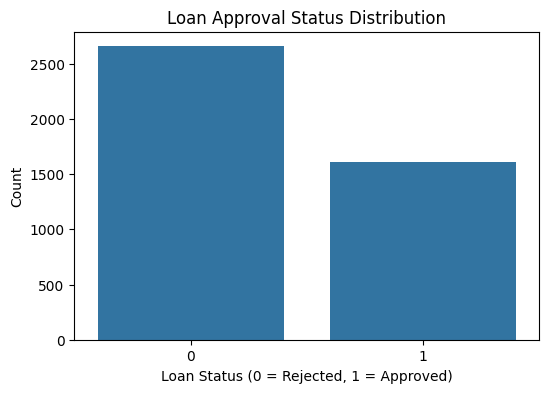

In [8]:
# Loan Status Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data)
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.title("Loan Approval Status Distribution")
plt.show()

## Correlation Matrix Heatmap

**A correlation matrix helps us understand the relationships between different numerical features in the dataset, which is useful for identifying potential multicollinearity or feature importance.**

--- 
This heatmap visualizes the correlation matrix of the numerical features in the dataset. It shows how strongly features are correlated with each other, with values ranging from **-1 (perfect negative correlation) to +1 (perfect positive correlation)**. A heatmap provides a clear, intuitive visualization of the correlations between variables. The color intensity indicates the strength of the correlation, making it easy to spot strong relationships at a glance.


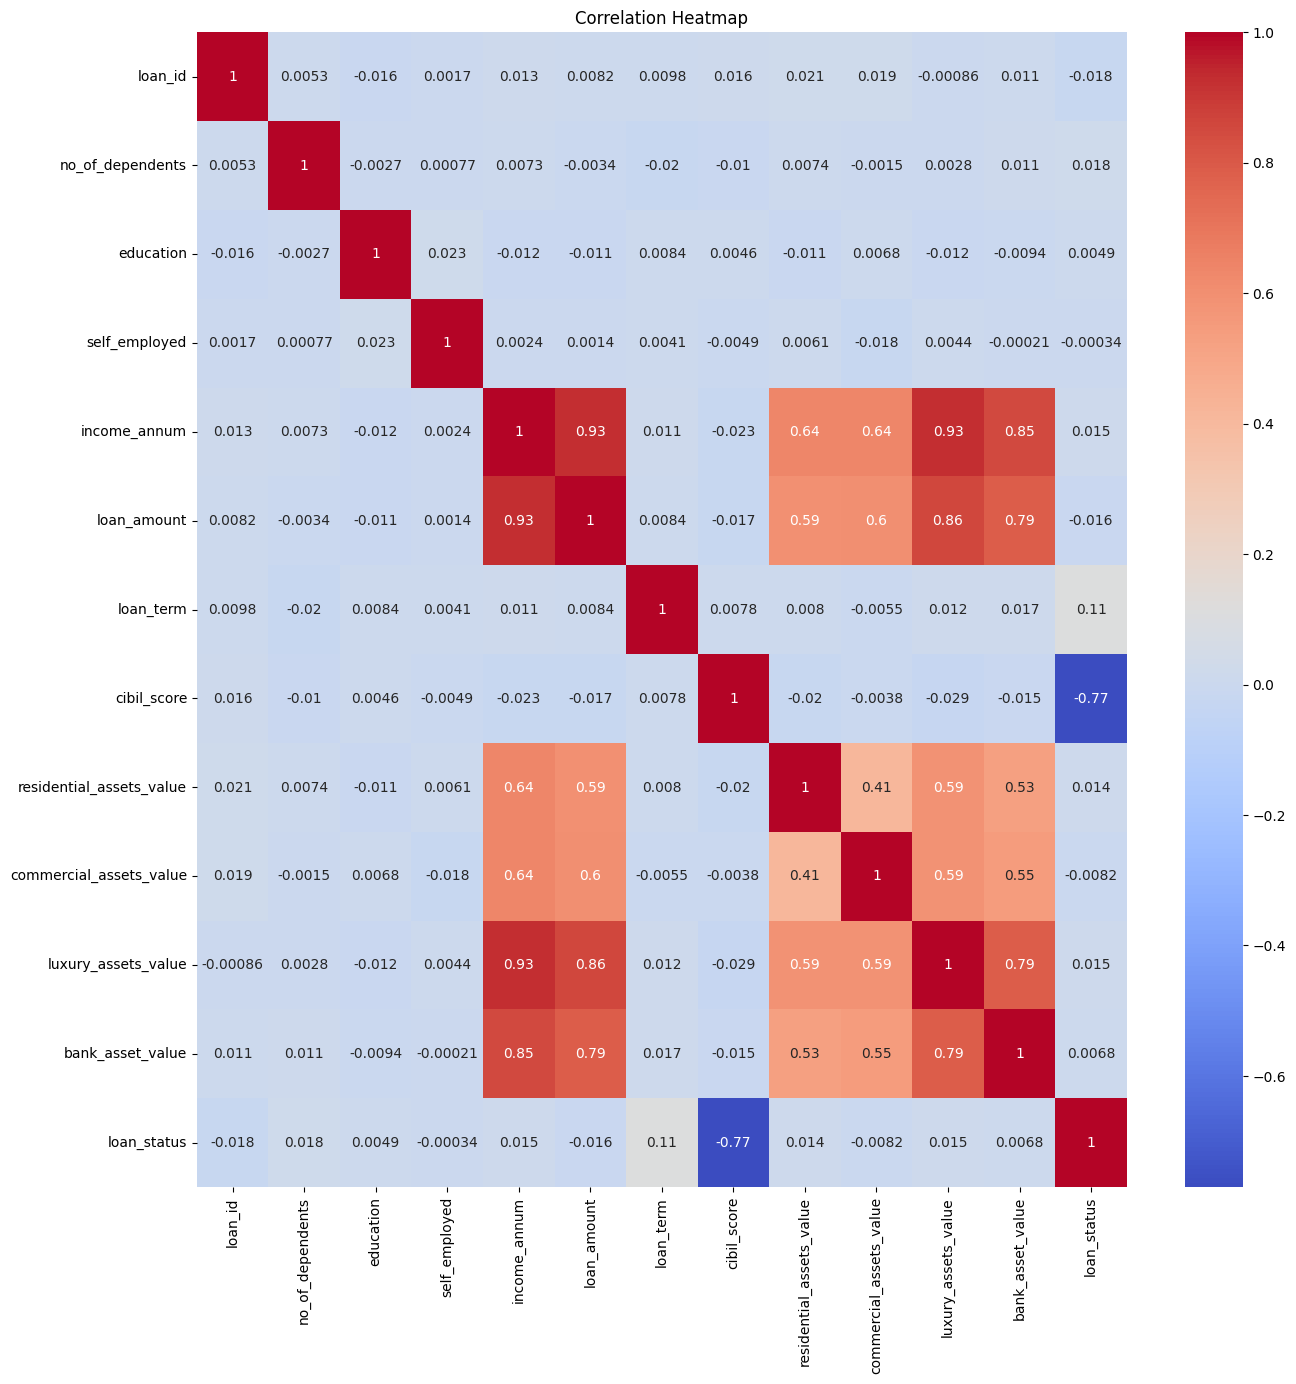

In [9]:
# Correlation Matrix Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Sorted Correlation Values

**Sorting the correlation values between features and the target variable (loan status) helps identify the most important features influencing the loan approval decision.**

----  
This step calculates and sorts the correlation values between all features and the target variable (`loan_status`) in descending order.  Sorting helps in quickly identifying which features are most strongly correlated with the target variable. The higher the correlation, the more important that feature might be for predicting the target.



In [10]:
# Sorted Correlation Values
print("\n Feature Correlation with Loan Status:\n")
print(data.corr()['loan_status'].sort_values(ascending=False))


 Feature Correlation with Loan Status:

loan_status                 1.000000
loan_term                   0.113036
no_of_dependents            0.018114
luxury_assets_value         0.015465
income_annum                0.015189
residential_assets_value    0.014367
bank_asset_value            0.006778
education                   0.004918
self_employed              -0.000345
commercial_assets_value    -0.008246
loan_amount                -0.016150
loan_id                    -0.017685
cibil_score                -0.770518
Name: loan_status, dtype: float64


## Feature Importance - Random Forest

**Understanding feature importance helps in identifying the most relevant features that contribute to the prediction of the target variable, which can guide feature selection and model improvement.**

---
This code uses a **Random Forest Classifier** to calculate the importance of each feature in predicting the target variable (`loan_status`). It then visualizes the importance of each feature using a bar plot. 
Random Forests can estimate feature importance by measuring how much each feature contributes to reducing the impurity (such as Gini impurity) in the decision trees. Features that reduce impurity more are considered more important.

C:\Users\ashwi\AppData\Local\Temp\ipykernel_12292\809058471.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='viridis')


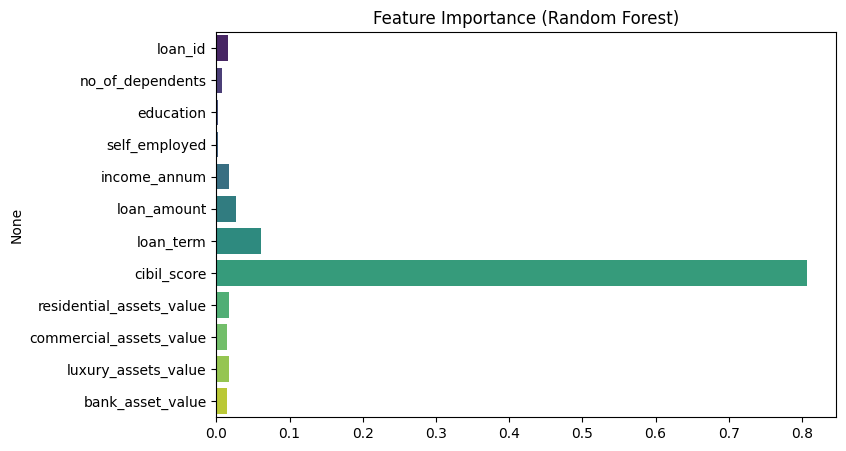

In [11]:
#  Feature Importance - Random Forest
X = data.drop(columns='loan_status')
y = data['loan_status']

rf_importance_model = RandomForestClassifier(random_state=42)
rf_importance_model.fit(X, y)

importance = rf_importance_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=feature_names, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

##  Dropping Low-Correlation Features

**Removing features that have little or no correlation with the target variable can help improve model performance by reducing complexity and preventing overfitting.**

--- 
Drops features with low correlation to the target variable (`loan_status`). These features are less likely to contribute meaningful information to the model and can be safely removed to simplify the model.

- **Why Drop Low-Correlation Features?**  
  Removing irrelevant or redundant features:
  1. Helps to improve the model's generalization ability.
  2. Reduces training time.
  3. Prevents overfitting by focusing on more relevant features.

In [12]:
# Dropping Low-Correlation Features
drop_columns = [
    'commercial_assets_value', 'self_employed', 'loan_id',
    'education', 'bank_asset_value', 'residential_assets_value'
]
data.drop(columns=drop_columns, inplace=True, errors='ignore')


##  Pairplot for Key Features

**A pairplot helps visualize the relationships between multiple features and the target variable. It provides insights into the distribution of features and how they interact with each other.**

---  
This code generates a **pairplot** for a selected set of features, with `loan_status` as the hue. It helps visualize how different features relate to one another and to the target variable (`loan_status`).
  
A pairplot is useful for:
  1. **Identifying trends and patterns** in feature interactions.
  2. **Checking the separability** of the classes (loan approval vs. rejection) based on the features.
  3. **Spotting outliers** and **distributions** of individual features.

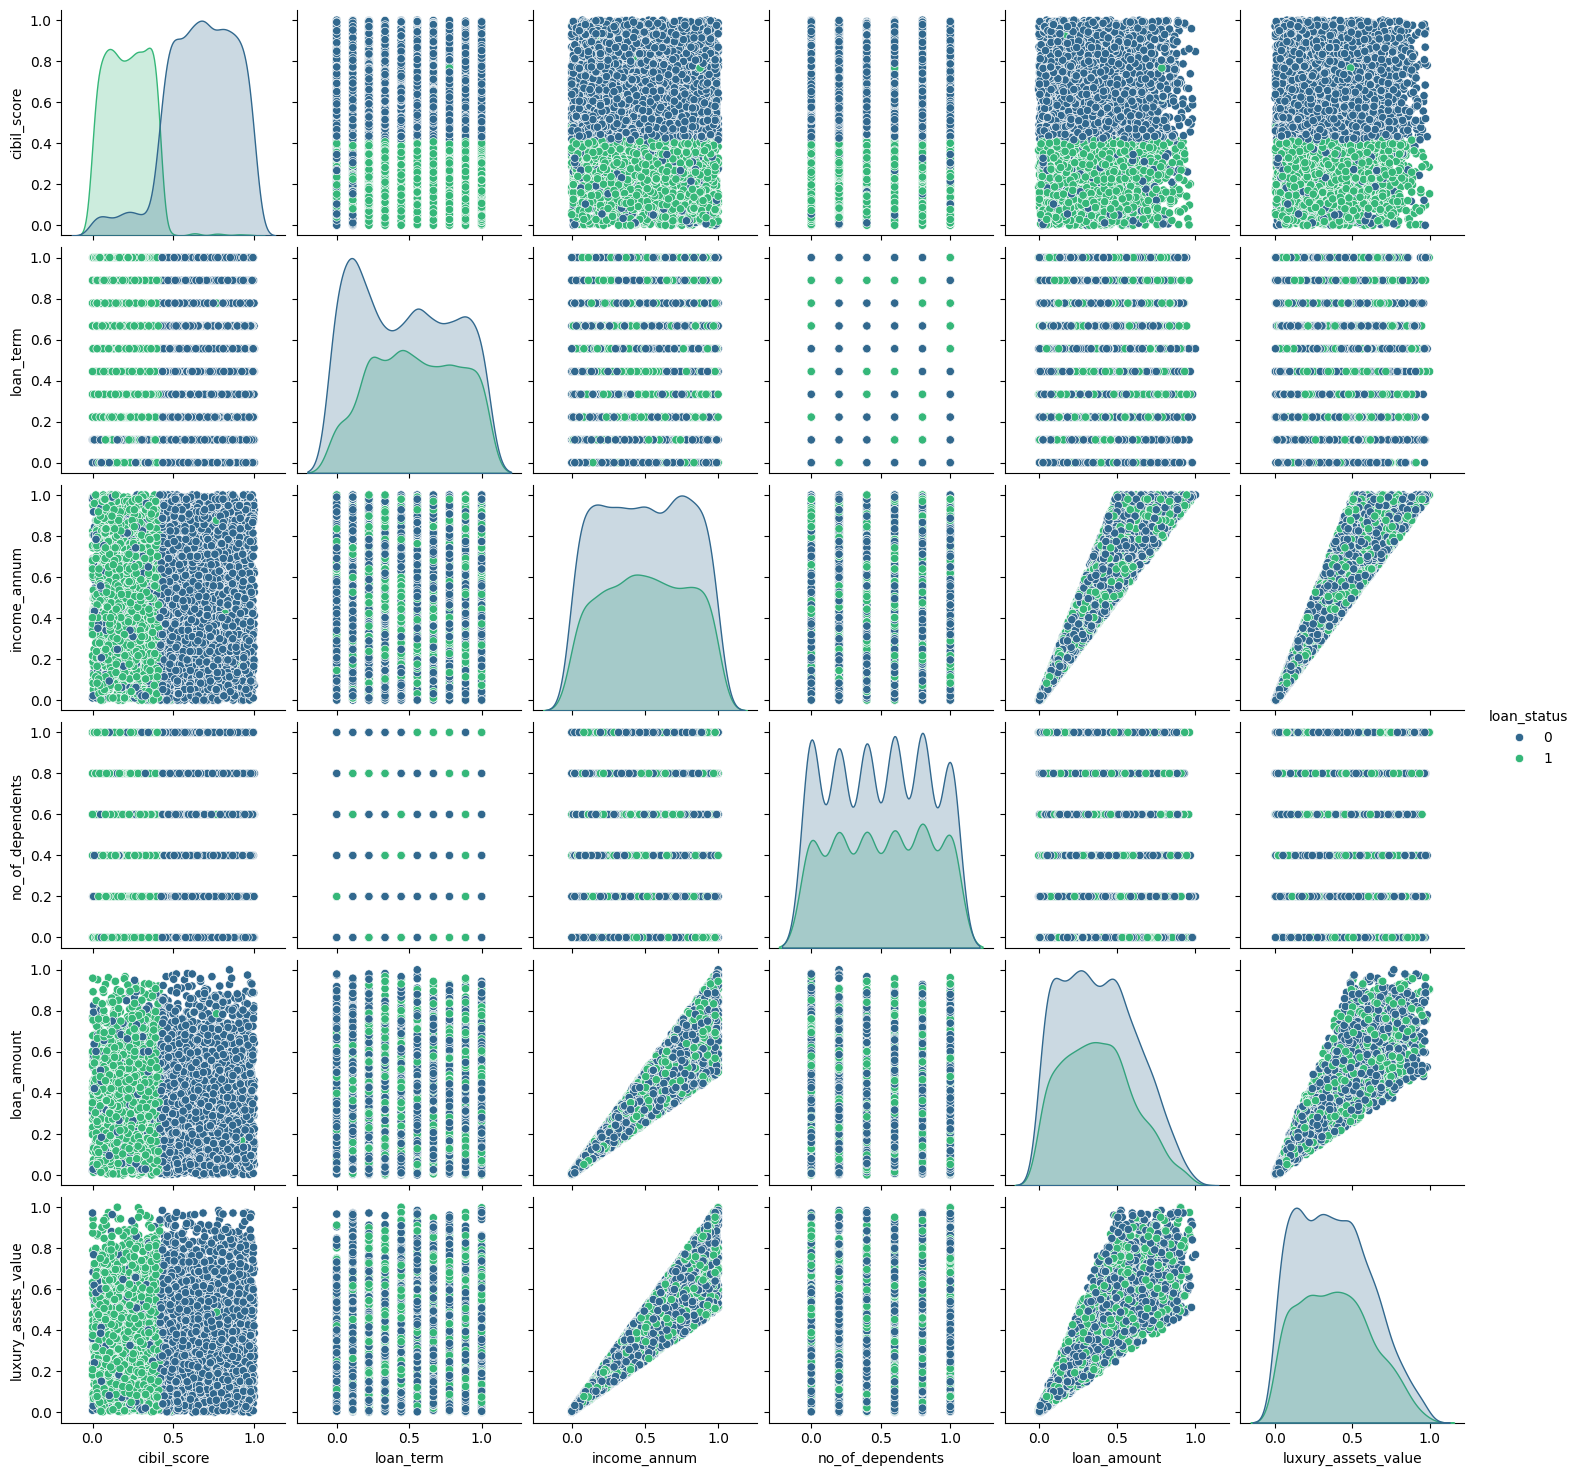

In [13]:
# Pairplot for Key Features
key_features = ['loan_status', 'cibil_score', 'loan_term', 'income_annum',
                'no_of_dependents', 'loan_amount', 'luxury_assets_value']
sns.pairplot(data[key_features], hue='loan_status', palette='viridis')
plt.show()

## Model Training & Evaluation

**In this step, we split the data into training and test sets, train three different models, and evaluate their performance. It helps in assessing how well each model generalizes to unseen data.**

---
This code:
  1. Splits the dataset into training and test sets.
  2. Trains three different models (`Logistic Regression`, `Decision Tree`, and `Random Forest`).
  3. Makes predictions using the trained models on the test set.


In [14]:
#  Model Training & Evaluation

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

## Function to Print Model Metrics

**Evaluating the performance of machine learning models using different metrics is to understanding how well the model performs and where it may need improvement.**

---  
 - This function `evaluate()` takes the model name, true labels (`y_true`), and predicted labels (`y_pred`), and calculates various performance metrics to assess the model's effectiveness.
 - Evaluating the model using multiple metrics provides a comprehensive view of its performance. Depending on the problem at hand, different metrics can be more relevant (e.g., accuracy, precision, recall).

---

### Metrics Calculated:
1. **Classification Report:**  
   Displays precision, recall, F1-score, and support for each class. It's especially useful for imbalanced datasets.
   
2. **Accuracy:**  
   The percentage of correct predictions out of the total predictions.
   
3. **Mean Absolute Error (MAE):**  
   Measures the average magnitude of the errors in a set of predictions, without considering their direction.

4. **Mean Squared Error (MSE):**  
   Measures the average of the squared differences between predicted and actual values. It penalizes larger errors more than MAE.
   
5. **Root Mean Squared Error (RMSE):**  
   The square root of MSE, which is interpretable in the same units as the target variable.
   
6. **R² Score:**  
   Represents the proportion of variance in the target variable that is predictable from the input features.

In [15]:
# Function to Print Model Metrics
def evaluate(name, y_true, y_pred):
    print(f"\n {name} Evaluation:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")

### Evaluating the models

In [16]:
# Evaluate All Models
evaluate("Logistic Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)
evaluate("Random Forest", y_test, rf_pred)



 Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       536
           1       0.89      0.88      0.88       318

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854

Accuracy: 91.45%
Mean Absolute Error: 0.0855
Mean Squared Error: 0.0855
Root Mean Squared Error: 0.2924
R2 Score: 0.6342

 Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Accuracy: 97.42%
Mean Absolute Error: 0.0258
Mean Squared Error: 0.0258
Root Mean Squared Error: 0.1605
R2 Score: 0.8898

 Random Forest Evaluation:
              

## Accuracy Comparison Plot

**Comparing the accuracy of different models visually helps to quickly assess which model performs best for the given task.**

--- 
  This code compares the accuracy of three different machine learning models — Logistic Regression, Decision Tree, and Random Forest — by plotting their accuracy scores. 
  Comparing model accuracies helps in selecting the best-performing model. It provides an easy-to-understand metric to determine which model generalizes the best to unseen data.

C:\Users\ashwi\AppData\Local\Temp\ipykernel_12292\402512491.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette='viridis')


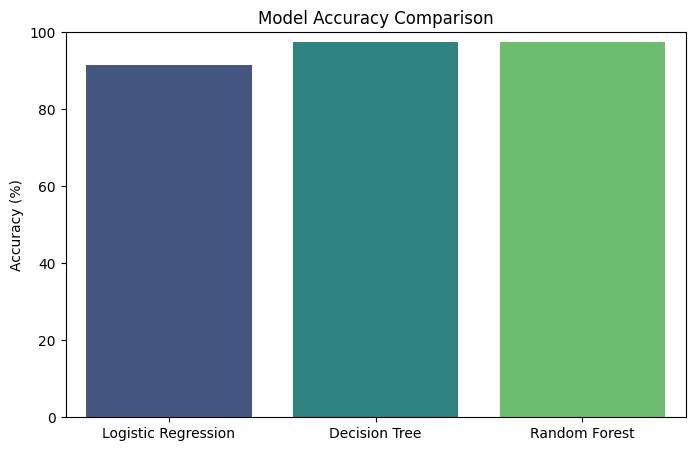

In [17]:
# Accuracy Comparison Plot
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
scores = [
    accuracy_score(y_test, lr_pred) * 100,
    accuracy_score(y_test, dt_pred) * 100,
    accuracy_score(y_test, rf_pred) * 100
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=scores, palette='viridis')
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()

## Confusion Matrix Visualization

This section is used to evaluate the performance of each machine learning model beyond just accuracy by plotting confusion matrices.

---
- A confusion matrix is a table used to describe the performance of a classification model on a set of test data.
- It shows the true positive, true negative, false positive, and false negative values.
- Helps to understand not only the errors but also the types of errors (for example, false approvals vs. false rejections).


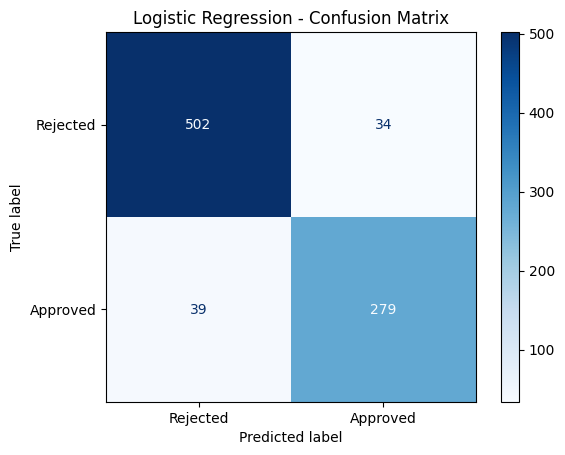

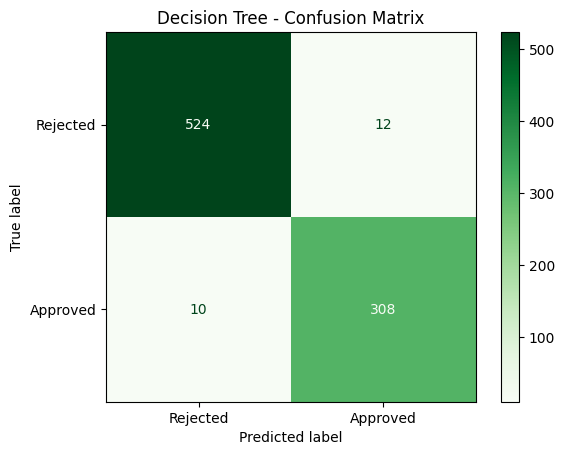

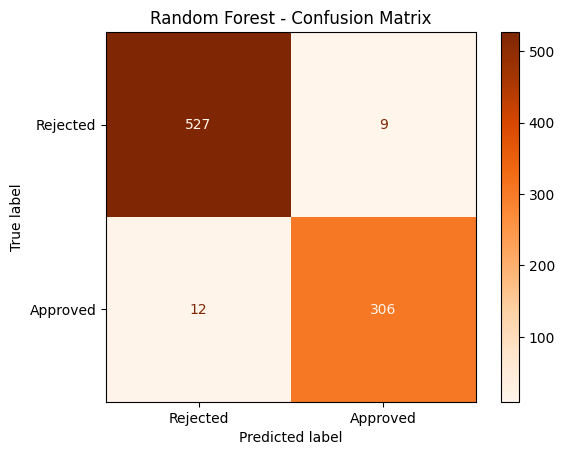

In [18]:
# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, lr_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Rejected', 'Approved'])
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, dt_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Rejected', 'Approved'])
disp_dt.plot(cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Rejected', 'Approved'])
disp_rf.plot(cmap='Oranges')
plt.title("Random Forest - Confusion Matrix")
plt.show()

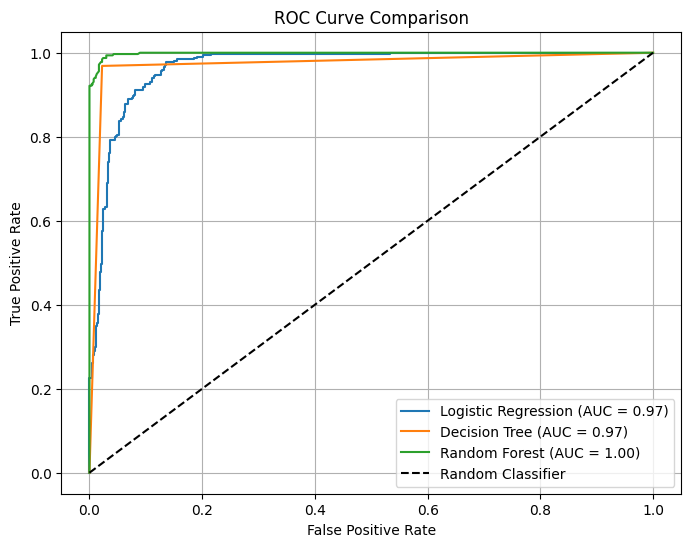

In [19]:
# Predict probabilities (instead of class labels!)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC Curve and AUC for each
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

auc_lr = auc(fpr_lr, tpr_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# Diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Save Models for Deployment

**Saving trained machine learning models is essential for deploying them in production, allowing predictions to be made without retraining the model each time.**

---  
  This code saves the trained models (Logistic Regression, Decision Tree, and Random Forest) to disk using **joblib**. The saved models can later be loaded and used for making predictions in a production environment. 
Saving models is important because:
  1. **Avoid retraining:** Once the model is trained, you can reuse it without the need to retrain every time.
  2. **Deployment:** Saved models can be loaded into applications, web services, or streamlit apps for real-time prediction.
  3. **Reproducibility:** It ensures that the exact same model is used every time predictions are made.

In [20]:
# Save Models for Deployment
joblib.dump(lr_model, r"D:\loan_approval_pred\ml_model\lr_model.pkl")
joblib.dump(dt_model, r"D:\loan_approval_pred\ml_model\dtree_model.pkl")
joblib.dump(rf_model, r"D:\loan_approval_pred\ml_model\rf_model.pkl")

print("\n Models saved successfully!")


 Models saved successfully!
